**Required packages**
lifelines
wheel
pandas

In [11]:
import  pandas as pd

In [ ]:
dataset = pd.read_csv("lung.csv")
dataset.head()

In [22]:
#data transformation
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


The Kaplan-Meier estimator operates as a tool for computing the probability of a particular entity enduring beyond a specified timeframe. Its application ranges across various scenarios, including determining the survival rate after a diagnosis, predicting the likelihood of a customer re-engaging after their last purchase or anticipating the renewal rate after a subscription cessation.

This estimator focuses on the calculation of probabilities pertaining to various outcomes. For instance, in a medical context, it may calculate the probability of a patient's survival; in a business setting, it can provide insights on customer retention or subscription renewal rates. The Kaplan-Meier estimator is particularly renowned for its frequent use in medical research.

The estimator's graphical representation typically exhibits an 'S'-shaped curve, characterizing the survival probabilities over time. The underlying formula for the Kaplan-Meier estimator is given by P(time) = P(time - 1) * (1 - (number of events at time/ number of survivors)), which portrays the dependency of survival probability on the prior timeframe.

The difference in estimates, or the 'gap', is understood as the probability of enduring the current day, contingent upon survival in the preceding timeframe. Hence, the probability of survival in the current day will not exceed that of the previous day.

Over time, there's an observable decline in survival likelihood when you amalgamate the probabilities across all days. This cumulative effect gives rise to the characteristic survival curve, which mirrors the one depicted here.

Censoring is a key concept in survival analysis, with three predominant types: right censoring, left censoring, and interval censoring.

Right censoring is the most prevalent form of censoring in survival analysis. It signifies a scenario where an event is yet to occur or is yet to be observed within a study period. For instance, a person is considered alive until their death is recorded, or a customer is assumed active until the end of their subscription. The precise occurrence time of these events remains uncertain until they transpire, hence the term 'right censoring'.

Left censoring, on the other hand, refers to situations where the commencement of the event or condition under study is unknown or unrecorded. An example might be a disease that began before the patient was included in the study or a customer's subscription that started prior to the data collection period. The primary point of reference is thus the moment of first record, which acts as the 'starting point' for left-censored data.

Interval censoring is another variant, frequently encountered outside of digital environments where data tracking may not be as precise. Consider a traditional brick-and-mortar store where customer data isn't continuously monitored or recorded. It's challenging to accurately discern customer churn, as you're unaware of their activities unless a purchase transaction or other recordable event occurs. In these cases, you only know that the event happened within a certain interval, hence the term 'interval censoring'. This type of censoring captures the uncertainty around the exact time of event occurrence, which can be anywhere within a particular time interval.

In [28]:
#kaplan meier estimator
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.time, event_observed = dataset.status)
model.event_table.head(4)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224


In [32]:
#calculation for specific events

day_5 = model.event_table.iloc[1, :]
print(day_5)
surv_5 = 1 * (1- day_5.observed / day_5.at_risk)
print(surv_5)
day_11 = model.event_table.iloc[2, :]
surv_11 = 1 * (1- day_11.observed / day_11.at_risk)
print(surv_11)

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int64
0.9956140350877193
0.986784140969163


In [34]:
# approximation
surv_11_approx = (day_11.at_risk - day_11.observed)/ day_11.at_risk
print(surv_11_approx)

0.986784140969163


Text(0, 0.5, 'Survival')

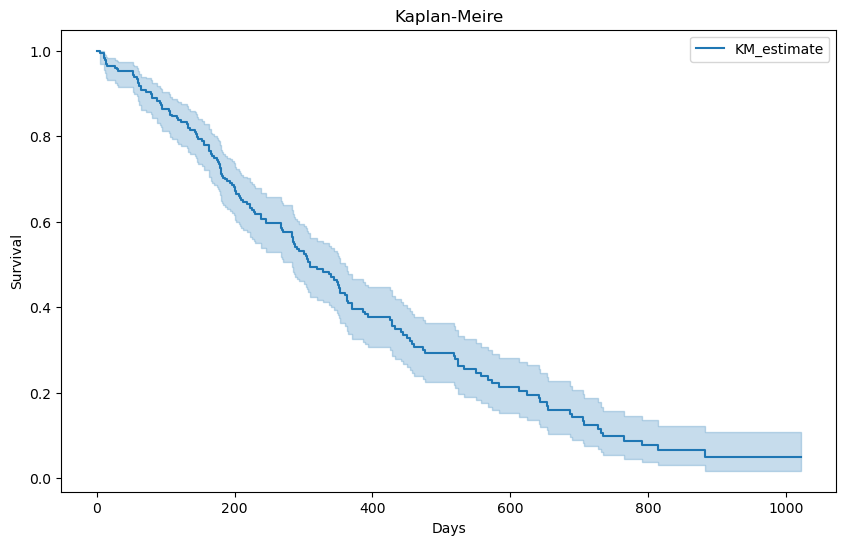

In [40]:
#visualization
#plotting Kaplan_meire
import matplotlib.pyplot as plt
model.plot(figsize = (10,6))
plt.title("Kaplan-Meire")
plt.xlabel("Days")
plt.ylabel("Survival")

It is not the sharp S shaped curve. But you definitely see here that there is some curving at least on the lower part of the graph. And one of the things here is that, you know, at least it's pretty much linear in a way, the survival or the evolution of this survival probability.And up until it really starts to curve and I'm going to say around this five percent, and that would be that five percent of the people that had lung cancer, they actually managed to survive. Pretty scary statistic, but unfortunately, that is life.

Text(0, 0.5, 'Survival')

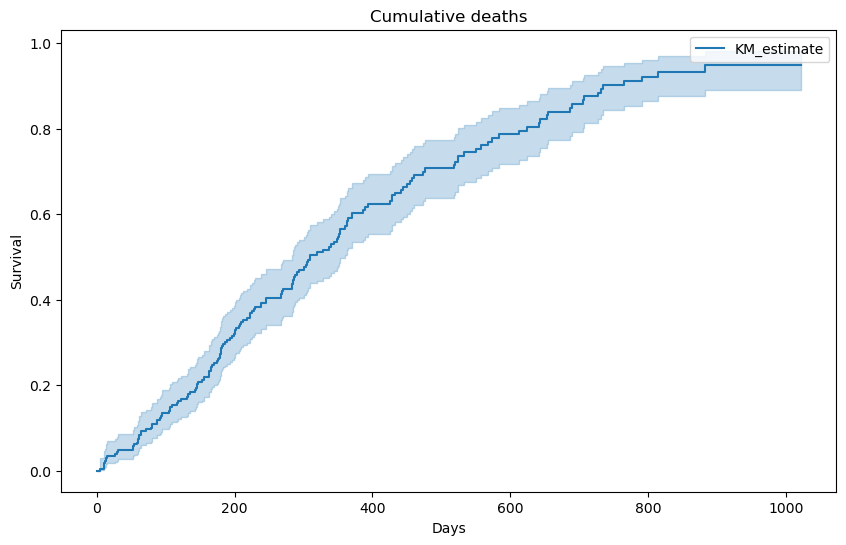

In [41]:
import matplotlib.pyplot as plt
model.plot_cumulative_density(figsize = (10,6))
plt.title("Cumulative deaths")
plt.xlabel("Days")
plt.ylabel("Survival")

So this is cumulative deaths that have occurred and it's just a different way of looking at it so that in the end you actually get something that's 100 percent because it is really about the total amount that assorting.

The Log Rank Test is a statistical hypothesis test that is employed to compare survival distributions of two or more groups. Its main aim is to determine whether there are significant differences in the survival experiences of these groups.

The null hypothesis for the Log Rank Test posits that there is no difference between the groups in terms of survival times. In other words, it assumes that the probability of an event (such as death or failure) occurring at any point in time is the same for all groups being compared.

The decision to accept or reject this null hypothesis is based on the p-value obtained from the test. A p-value greater than the conventional significance level of 0.05 would lead us to fail to reject the null hypothesis. This implies that the survival experiences of the two groups are not significantly different from each other.

Conversely, if the p-value is less than 0.05, we would reject the null hypothesis. This suggests that there is a statistically significant difference in the survival experiences between the groups being compared. Therefore, the p-value acts as the threshold that helps us decide whether the observed differences in survival are due to chance or reflect genuine differences between the groups.

In [42]:
# Male vs Female
male = dataset.query("sex == 1")
male.head()
female = dataset.query("sex == 2")
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [46]:
#Kaplan-Meier per gender
model_male = KaplanMeierFitter()
model_male.fit(durations = male.time, event_observed = male.status)
model_female = KaplanMeierFitter()
model_female.fit(durations = female.time, event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

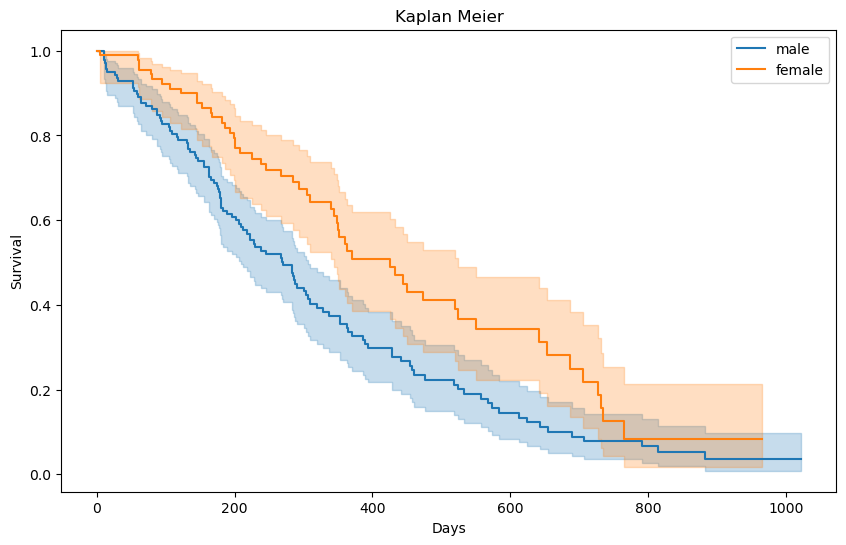

In [49]:
model_male.plot(figsize = (10,6), label = "male")
model_female.plot(label = "female")
plt.title("Kaplan Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [52]:
#Log_rank_test
from lifelines.statistics import logrank_test
logrank_test(durations_A = male.time, durations_B = female.time, 
         event_observed_A = male.status, event_observed_B = female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

Here we have that test results and we see here that the p value, it is very, very low.So this means that there are some differences between both groups, which for me, they do make sense given all the curves or all little.